<a href="https://colab.research.google.com/github/YuvinNavod/Python-Machine-Learning-Projects/blob/main/03_House_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset link = https://drive.google.com/file/d/1iZ7BTngNKxy3rSoLCRaG4nBUcTqKvjG4/view?usp=drive_link

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

import the boston house price dataset

In [ ]:
house_price_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine learning projects/03.House Price Prediction /BostonHousing.csv')

In [ ]:
#print first five rows
house_price_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
house_price_dataset.shape

(506, 14)

In [ ]:
#check any missing value
house_price_dataset.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


In [ ]:
#statistical mesures of dataset
house_price_dataset.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**understanding the correlations between various features in dataset**

> 1. positive correlation
2.negative  correlation



In [ ]:
correation = house_price_dataset.corr()

<Axes: >

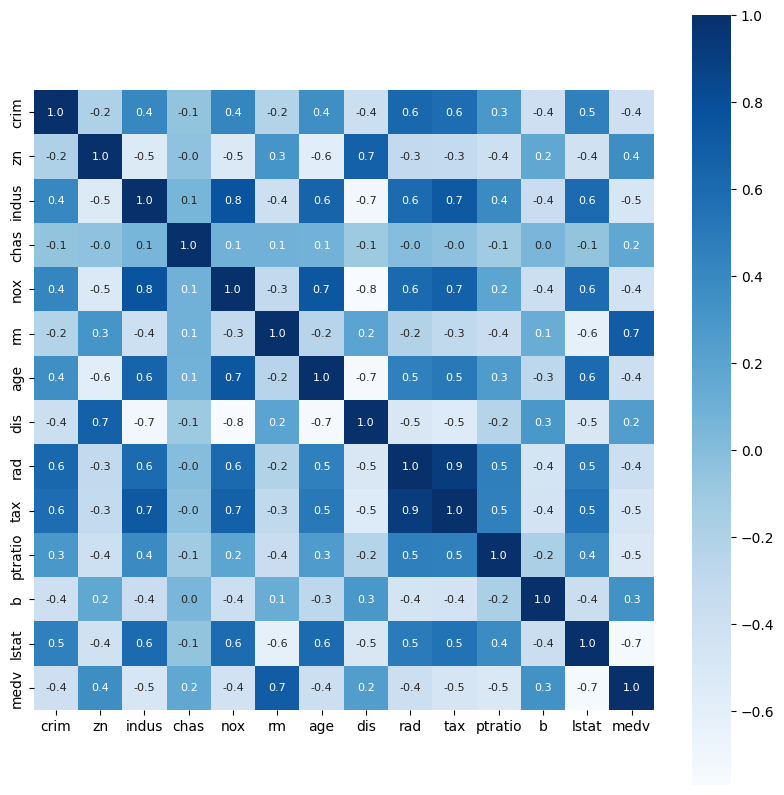

In [ ]:
#constucting a  heatmap to understand the correations

plt.figure(figsize=(10,10))
sns.heatmap(correation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

splitting data and target

In [ ]:
x=house_price_dataset.drop(['medv'],axis=1)
y=house_price_dataset['medv']

In [ ]:
print (x)
print (y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

splitting to data into tranig and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
print(x.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


model trainig

In [ ]:
#XGBoost Regressor
#loading the model
model = XGBRegressor()


In [ ]:
#TRANIG THE MODEL
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

prediction on traing data

In [ ]:
#accuracy
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[25.281103  23.31412    7.204563  21.167564  11.704863  27.000803
 29.591314  26.50979   43.503834  23.619799  10.999919  33.391537
 36.00788   36.399265  19.028671  20.198929  34.90926   50.00035
 19.294802  14.885604  26.626898  19.8843    24.790934  21.192629
 23.910225  20.588547  23.09622   27.991076  19.985487  23.101835
 24.99628    9.698857  23.894276  36.081387  13.397239  12.741484
 39.79849   10.396599  20.601946  17.743242  19.490051  23.71323
 28.501348  24.276476  23.790792  19.052214  28.378448  20.498322
 33.819885  14.499767  20.385319  15.997922  13.303482  30.782928
 27.491224  24.391848  24.398573  25.154491  43.82388   21.91346
 26.215363  14.224116  20.787481  20.102007  23.096603  13.075941
 16.20462   24.796045  20.210478  22.490742  14.797893  28.697199
 20.108065  23.393608  31.992435  19.128254  50.00928   20.896215
 21.71107   22.012766  17.200949  30.305117  12.262996  21.399649
 20.503916  35.201008  19.629463  22.009233  21.697618  14.087536
 21.096066  1

In [ ]:
#R suared error
score_1 = metrics.r2_score(Y_train,training_data_prediction)
print("R squared error : ",score_1)

#mean absolute error
Score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("Mean Absolute Error : ",Score_2)

R squared error :  0.9999958965172508
Mean Absolute Error :  0.012576152310513095


predicton on test data

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

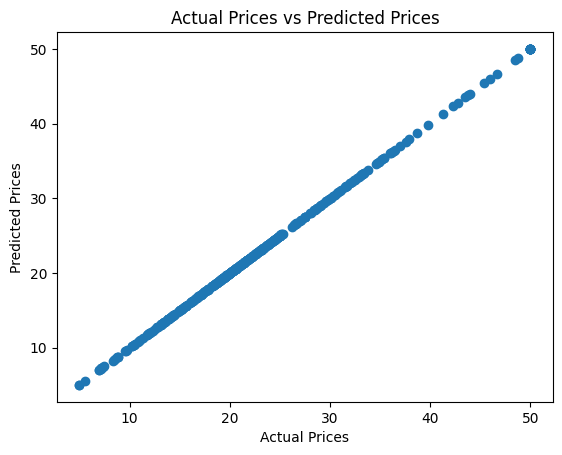

In [ ]:
#visualizig actual and prediction price
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

In [ ]:
#accuracy
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[28.25244  28.731762 18.859758 20.687983 20.842443 20.084587 27.262035
 19.040174 20.424143 22.99985  31.539501 32.43339  19.99154  19.19272
 18.38373  23.393026 12.879418 44.124924 22.569138 15.028631 19.734686
 18.650427 23.859623 23.27529  26.142296  8.619358 13.851447 19.234715
 46.480568 11.461556 26.717323 18.072702 48.522766 17.746061 23.836948
 21.050343 17.154285 32.513588 13.949366 21.935308 23.592558 22.57608
 25.441147 17.784962 14.075541  9.252019 48.64045  11.04867  20.893543
 19.030233 23.082336 21.25865  24.094666 19.282824  8.737773 22.928942
 11.748472 24.429935 20.31184  40.367107 16.695768 25.689665 12.417592
 13.474819 15.777904 35.544815 40.422913 23.272434 21.224659 21.147192
 24.85442   7.758489 16.823906 19.874205 19.171438 20.44447  43.658875
 24.214212 29.324774 31.244894 16.663187 18.560524 36.69007  11.677144
 23.63581  22.804045 13.540202 24.382751 20.333961 17.708744 24.071835
 48.925076 15.331659 21.14849  15.659127 20.545631 23.328913 24.514893
 46.4678

In [ ]:
#R suared error
score_1 = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",score_1)

#mean absolute error
Score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)
print("Mean Absolute Error : ",Score_2)

R squared error :  0.9023156219019987
Mean Absolute Error :  2.3501096061631745


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

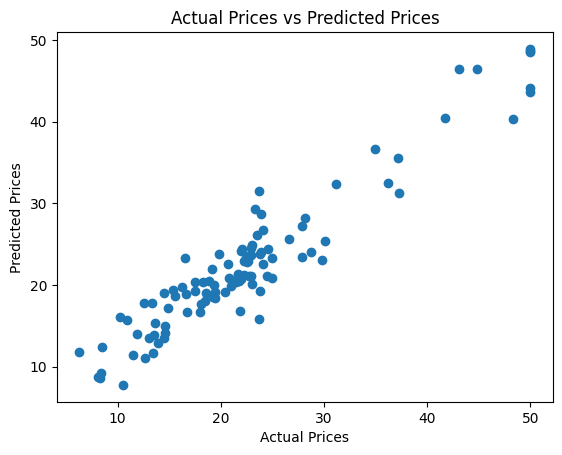

In [ ]:
#visualizig actual and prediction price
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")